# Purpose

I have two goals for this project:

1. To help you master data manipulation and visualization
1. To help you understand the risk-return tradeoff for several measures of risk

# Tasks

## Packages and Settings

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%config InlineBackend.figure_format = 'retina'
%precision 4
pd.options.display.float_format = '{:.4f}'.format

## Data

I used the following code cell to download the data for this project.
Leave this code cell commented out and use the CSV files I provided with this notebook.

In [3]:
# import yfinance as yf
# import pandas_datareader as pdr
# import requests_cache
# session = requests_cache.CachedSession(expire_after=1)

In [4]:
# wiki = pd.read_html('https://en.wikipedia.org/wiki/Russell_1000_Index')

In [5]:
# (
#     yf.Tickers(
#         tickers=wiki[2]['Ticker'].str.replace(pat='.', repl='-', regex=False).to_list(),
#         session=session
#     )
#     .history(period='max', auto_adjust=False)
#     .assign(Date = lambda x: x.index.tz_localize(None))
#     .set_index('Date')
#     .rename_axis(columns=['Variable', 'Ticker'])
#     ['Adj Close']
#     .pct_change()
#     .loc['1962':'2022']
#     .to_csv('returns.csv')
# )

In [6]:
# (
#     pdr.DataReader(
#         name='F-F_Research_Data_Factors_daily',
#         data_source='famafrench',
#         start='1900',
#         session=session
#     )
#     [0]
#     .rename_axis(columns='Variable')
#     .div(100)
#     .loc['1962':'2022']
#     .to_csv('ff.csv')
# )

Run the following code cell to read the data for this project.
The `returns.csv` file contains daily returns for the Russell 1000 stocks from 1962 through 2022, and the `ff.csv` contains daily Fama and French factors from 1962 through 2022.

In [7]:
returns = pd.read_csv('returns.csv', index_col='Date', parse_dates=True)
ff = pd.read_csv('ff.csv', index_col='Date', parse_dates=True)

## Single Stocks

For this section, use the single stock returns in `returns`.
You may select years $t$ and $t+1$, but only use stocks with complete returns data for years $t$ and $t+1$.

### Task 1: Do mean returns in year $t$ predict mean returns in year $t+1$?

## The functions that have been created to perform various tasks on a single stock for the years T(2018) and T+1(2019) can be used for any stock in the dataset at any year with ease. This means that the same functions can be applied uniformly to all stocks and years without any need for modification. 

In [8]:
# Created a funtion to compute mean returns
def mean_return(returns, tickers, start_date, end_date):
    result = {}
    for ticker in tickers:
        t = returns[ticker].loc[start_date:end_date]
        t_mean = t.mean() * 252 * 100
        result[ticker] = t_mean
    return result

tickers = ['AAPL']
result = mean_return(returns, tickers, start_date = '2018-01-01', end_date= '2018-12-31')

In [9]:
# Mean return of AAPL 
print(result)

{'AAPL': -1.4429853931918435}


<AxesSubplot:xlabel='2018-12-31', ylabel='2019-12-31'>

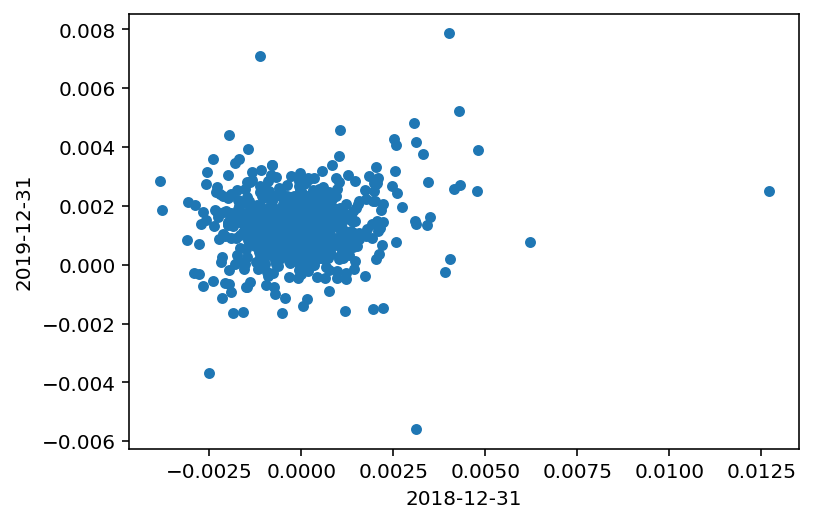

In [10]:
# Plot of mean returns 
df_1 = returns.loc['2018':'2019'].dropna(axis=1).resample('A').mean()
df_1.T.plot(x='2018-12-31', y='2019-12-31', kind='scatter')

In [11]:
# Return correlation between 2018 to 2019 of stock returns
df_1.T.corr()

Date,2018-12-31,2019-12-31
Date,,
2018-12-31,1.0000,0.0988
2019-12-31,0.0988,1.0000


## Comment on Mean Returns for t+1 year 

We have conducted this analysis by computing the mean return for 2018 and 2019 using AAPL, GOOG, MSFT, A, and AA. The computation was done by determining the mean return for the specific year 2016 using the stocks of AAPL, GOOG, MSFT, A, and AA based on their historical data. The dot mean function (".mean()") was used for the computation. We constructed a function that adds in any stock and date per our requirements using historical data. Further to our analysis, there is a chance that we can forecast the mean returns for t+1 years. However, there may be certain constraints or restrictions. 

Both technical and fundamental approaches can be used to predict the mean returns of year t +1. However, our analysis is based on the technical approach. We must state that the performance of the business, market returns, and its fundamentals determine the expected returns on any stock. 

Since our prediction is based on technical analysis in forecasting the returns for the following year(t+1), we believe that portfolio managers or securities traders utilize charts of historical trends in making trading and investment decisions. From the chart in our analysis, there is a positive correlation between the stock returns in 2018 and 2019, amounting to 0.09x. We also noticed the two years' returns are centered around the same position, indicating a signal for predictions. Meanwhile, there are other factors or variables we could explore in predicting the mean for t +1 where we factor in the company's earnings, its historical dividend and yield, earnings per share, and price-to-earnings ratio to prove our point further. Still, we are constrained to using this based on the data provided to us.

Also, based on the historical returns, we may be able to predict the returns for a company using leading indicators like RSI (Relative strength index) and MACD (Moving average convergence/ divergence indicators) to access the historical patterns of the company as well as other macroeconomic indicators affecting the stocks over time.

### Task 2: Does volatility in year $t$ predict volatility in year $t+1$?

In [91]:
# Created a funtion to compute volatility
def vol1_return(returns, tickers, start_date, end_date):
    result = {}
    for ticker in tickers:
        s = returns[ticker].loc[start_date:end_date].resample('A')
        v = s.std() * 100
        result[ticker] = v
    return result

tickers = ['AAPL']
result = vol1_return(returns, tickers, start_date = '2018-01-01', end_date= '2018-12-31')

In [92]:
# Volitality of AAPL 
print(result)

{'AAPL': Date
2018-12-31   1.8106
Freq: A-DEC, Name: AAPL, dtype: float64}


In [93]:
# Volitality of stock returns
df_1 = returns.loc['2018':'2019'].dropna(axis=1).resample('A').std()*100
df_1

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACHC,...,XPO,XRAY,XYL,YUM,Z,ZBH,ZBRA,ZG,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,1.7056,2.8202,2.5231,2.0279,1.8106,2.2171,1.9134,1.4172,1.2436,2.6966,...,3.0614,1.9579,1.6443,1.2340,3.2876,1.4786,2.5399,3.2882,1.5735,1.4788
2019-12-31,1.5413,2.4776,2.2384,1.6701,1.6466,1.7144,1.7256,1.2512,1.1016,2.1125,...,2.5776,1.6537,1.4269,0.9781,3.1780,1.3780,2.3971,3.0851,1.5840,1.3067


<AxesSubplot:xlabel='2018-12-31', ylabel='2019-12-31'>

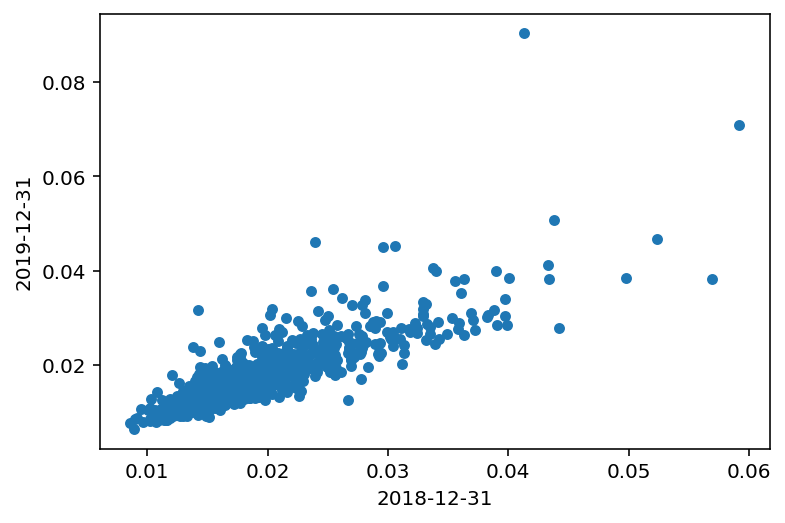

In [94]:
# Plot of volitality of returns 
df_1 = returns.loc['2018':'2019'].dropna(axis=1).resample('A').std()
df_1.T.plot(x='2018-12-31', y='2019-12-31', kind='scatter')

In [95]:
# Volitality correlation between 2018 to 2019 of stock returns
df_1.T.corr()

Date,2018-12-31,2019-12-31
Date,,
2018-12-31,1.0000,0.8443
2019-12-31,0.8443,1.0000


## Comment on Volitality for t+1 year

We have carried out this task by computing the Volatility of stock returns. We first computed that of AAPL, which resulted in a 1.81% volatility in 2018, while 2019 stood at 1.64%. Conversely, we arrived at this figure using historical data. The Volatility of a stock is the standard deviation of a stock’s annualized returns over a given period which indicates the range in which the stock prices may increase or decrease. We have computed the Volatility of year t by creating a function (vol_returns) where we arrived at the standard deviation of the various 1010 stocks provided in the data sheet. 

Nonetheless, while we understand that Volatility in year t is helpful for predicting Volatility in year t+1 which resulted in a positive correlation between 2018 and 2019, it is not a reliable indicator in predicting what the next period of Volatility should result to. We understand that the Volatility of a stock is driven by so many factors, including government policies and regulations, investors’ sentiments towards a stock or company, macroeconomics data releases like inflation, GDP, and consumer spending, which impact market performance, fundamentals of a company, e.g., it earnings and product releases as well as industry and sectors specific events. However, we note that Volatility can create opportunities for portfolio managers or investors because it provides entry points for advantage or arbitrary positions. 

Relying on Volatility for predicting t+1 can be risky and uncertain as markets are not constant. Furthermore, the plot in our analysis indicates heteroscedasticity from a regression perspective as the volatility data of the years are scattered towards the end of the year, which indicates that the variables are not constant. 

Therefore, while there is a positive correlation between 2016 and 2017, the prediction for Volatility in year t+1 using year t data cannot be assured.

### Task 3: Do Sharpe Ratios in year $t$ predict Sharpe Ratios in year $t+1$?

In [96]:
# Created a funtion to compute sharpe ratio
def sharpe_ratio(returns, ticker, start_date, end_date):
    t_std = returns[ticker].loc[start_date:end_date].dropna(axis=1).std()
    excess_returns = ff['Mkt-RF'].loc[start_date:end_date].mean()* np.sqrt(252)
    sharpe_ratio =  (excess_returns / t_std)
    return sharpe_ratio

# Created a range of dates to compute sharpe ratio for t & t+1 year
date_ranges = [('2018-01-01', '2018-12-31'), ('2019-01-01', '2019-12-31') ]
sharpe_ratios = []
for start_date, end_date in date_ranges:
    sr = sharpe_ratio(returns, ticker, start_date, end_date)
    sharpe_ratios.append(sr)
    
# Wrote a code to make a table for start and end year 
results = pd.DataFrame({
    'Start Date': [d[0] for d in date_ranges],
    'End Date': [d[1] for d in date_ranges],
    'Sharpe Ratio': sharpe_ratios
})

pd.set_option('display.width', 1000)
pd.set_option('display.precision', 100)

print('\nSharpe Ratios for Ticker {}'.format(ticker))
print('-----------------------')
print(results.to_string(index=False))

NameError: name 'ticker' is not defined

## Comment on Sharpe Ratio for t+1 year

We understand that Sharpe Ratio is a risk-adjusted measure that shows how well an investment performed in historical years while considering the level of risk. We arrived at the Sharpe ratio by computing the standard deviation and excess return of the stock to ascertain the return of the stock in relation to risk level. We also note that the higher the Sharpe Ratio, the better the stock’s historical risk-adjusted performance. Consequently, it is basically comparing an investment return and risk. It is also a mathematical statement of the realization that, rather than indicating superior investment ability, excess returns over time may be an indication of greater volatility and risk. 

We have computed the Sharpe ratio of year t (2018) for AAPL standing -0.1932, we also went further to compute for years 2019 and 2020 resulting in 0.9687 and 0.5810 respectively. We noticed volatility is the pattern of the Sharpe ratio over the years and as sure believe that arrive at a conclusion that we can use the Sharpe ratio of the year 2018 to predict that of 2019.  Volatility in the Sharpe ratio in a year could be due to a variety of catalysts, such as the state of the market, economic data, geopolitical developments, and changes in an investment plan. Hence, while a high Sharpe Ratio in year t may signify a well-managed and profitable investment in the past, it does not always imply that the same investment would perform well in year t+1. As a result, when predicting future sharp ratios investors shouldn't solely depend on present Ratios, they also need to take other aspects into account as the risk and returns keep changing each year.

Consequently, It is important to note that past performance does not necessarily predict future results. So, Sharpe Ratios in year t do not necessarily predict Sharpe Ratios in year t+1.

### Task 4: Do CAPM betas in year $t$ predict CAPM betas in year $t+1$?

In [97]:
# Created a funtion to compute CAPM beta
def calc_beta(returns, ff_data, rf_rate):
    mkt_rf_mean = ff['Mkt-RF'].loc['2018-01-01':'2018-12-31'].mean()
    t_mean = (returns.loc['2018-01-01':'2018-12-31']).mean()
    beta = (t_mean - rf_rate) / mkt_rf_mean
    return beta

# Created differenrt varaibles so that we can use it in the calc_beta function above 
aapl_returns = returns['AAPL'].loc['2018-01-01':'2018-12-31']
ff_data = ff['Mkt-RF'].loc['2018-01-01':'2018-12-31']
rf_rate =ff['RF'].loc['2018-01-01':'2018-12-31'].mean()

aapl_beta_2018 = calc_beta(aapl_returns, ff_data, rf_rate)
aapl_beta_2018

0.5840

## Comment on CAPM beta for year t+1

Do CAPM betas in year 𝑡 predict CAPM betas in year  𝑡+1
We understand that the CAPM Beta measures systematic risk, i.e. the risk inherent to the entire financial market, which cannot be diversified away by investing in a diversified portfolio. However, there is a typical delusion that Beta does not have a degree of correlation between security and the market; however, in the reality of computing, Beta uses the correlation between security and the market.

We understand that Beta in time t (2018) or historical beta is an important indicator of how sensitive the return of a stock is to the market return with consideration of risk. However, it will conclude that the past Beta of a stock cannot majorly predict future results. Therefore, computing historical Beta to predict future beta values is inappropriate for determining the stock forward risk-return.
To further prove our points, we compared the historical Beta of four years for 2017, 2018, 2019, and 2020 resulting in 2.04x, 0.58x, 2.56x, and 2.59x, respectively. Based on this analysis, we see that these figures are consistent and follow the same pattern, but if you consider efficient market hypotheses where be assumed and all information is public and available in the market, no one can outperform. If these assumptions play, then it is impossible to use the Beta to predict the next better. If not, it will also lead to an arbitrage position.

Based on the three efficient market hypotheses:
The weak form of EMH suggests that all past prices and trading volume data are reflected in current prices. This means that technical analysis, which relies on historical price and volume data to predict future prices, is less effective. Thus, market participants cannot profit by analyzing past price data because this information is already reflected in current prices.
The semi-strong form of EMH suggests that all publicly available information, including financial statements, news releases, and other public disclosures, are already reflected in current prices. This means that fundamental analysis, which relies on publicly available information to predict future prices, is less effective. Thus, semi-strong form EMH assumes that market participants cannot profit by analyzing publicly available information because this information is already reflected in current prices.
The strong form of EMH suggests that all information, including private information known only to insiders, is already reflected in current prices. This indicates that insider trading, which relies on information not available to the public, is also useless. Therefore, it assumes that no one can profit by trading on any information because all information is already reflected in current prices.
Therefore, we conclude that to ascertain the following year's Beta, we will require other factors like the fundamentals of the company (tax, capital structure), market conditions, industry information, investors' sentiment, returns on the stock, and stock risks (standard deviation).

Various factors can affect an asset's Beta, including changes in the economy, shifts in market sentiment, and unexpected events. Moreover, the CAPM beta is based on assumptions about the efficiency of the market and the behavior of investors, and these assumptions may not hold in all market conditions.

### Task 5: Does volatility in year $t$ predict *mean returns* in year $t+1$?

In [98]:
# Created a funtion to compute volatility

def vol1_return(returns, tickers, start_date, end_date):
    result = {}
    for ticker in tickers:
        s = returns[ticker].loc[start_date:end_date].resample('A')
        v = s.std() * 100
        result[ticker] = v
    return result

# Created a variable ticker so that we can use it in the function created above

tickers = ['AAPL']
result = vol1_return(returns, tickers, start_date = '2018-01-01', end_date= '2018-12-31')

In [99]:
# Final output of stock for a particluar year

result

{'AAPL': Date
 2018-12-31   1.8106
 Freq: A-DEC, Name: AAPL, dtype: float64}

In [100]:
# Created these variables so that we can use it in the plot

vol11 = returns.loc['2018-01-01':'2018-12-31'].dropna(axis = 1).std()
mean11 = returns.loc['2018-01-01':'2018-12-31'].dropna(axis = 1).mean() * 252

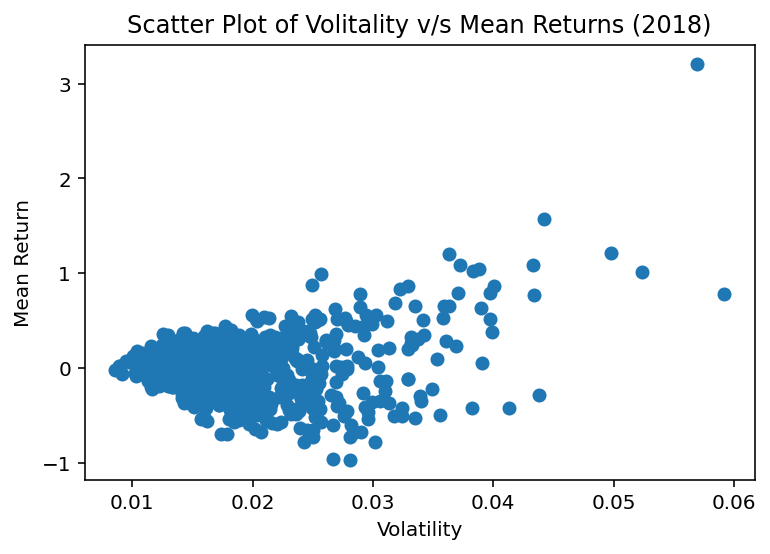

In [101]:
# Created this plot so that we can determine if there is some relationship between volatility and returns

plt.scatter(x=vol11, y= mean11)
plt.xlabel('Volatility')
plt.ylabel('Mean Return')
plt.title('Scatter Plot of Volitality v/s Mean Returns (2018)')
plt.show()

## Comment on mean returns in year t + 1 using volatility in year t

You cannot predict the mean of 2019 from the previous year's volatility (2018) because volatility is a measure of the dispersion of returns, not the level of returns themselves. Volatility represents the amount of variability or risk in an asset's returns, while the mean return represents the average level of return over a specific period. The volatility of an asset is calculated using historical returns, which can vary from year to year due to changes in market conditions, economic factors, or other unpredictable events. Therefore, the volatility of an asset in one year does not provide information about the level of returns in the next year, and thus it cannot be used to predict the mean return for the following year.

In summary, the volatility of an asset represents the risk or uncertainty in returns, while the mean return represents the average level of returns over a specific period, and they are two separate and distinct concepts. While past volatility can provide some indication of how much a stock's price may fluctuate in the future, there are several factors that can impact the relationship between volatility and future returns. 

Firstly, changes in market conditions, such as shifts in interest rates or global events, can greatly impact the performance of individual stocks and the market as a whole. These changes can cause stocks to become more or less volatile and may not be reflected in historical volatility measures.

Secondly, stock prices are influenced by a wide range of factors, including company earnings, financial performance, and overall market sentiment. These factors are constantly changing and can impact a stock's performance and returns in unpredictable ways.

Lastly, past volatility may not be indicative of future volatility. This is because the market is dynamic and constantly changing, with new risks and uncertainties arising all the time. As a result, relying solely on past volatility to predict future returns can be risky and lead to inaccurate predictions.

Therefore, while historical volatility is an important metric for assessing the risk of an investment, it should not be used in isolation to predict future returns. Investors should consider a range of factors, including company fundamentals, market conditions, and other relevant information, when making investment decisions.


### Task 6: Does CAPM beta in year $t$ predict *mean returns* in year $t+1$?

In [102]:
# Created a funtion to compute beta

def calc_beta(returns, ff_data, rf_rate):
    mkt_rf_mean = ff['Mkt-RF'].loc['2018-01-01':'2018-12-31'].mean()
    t_mean = (returns.loc['2018-01-01':'2018-12-31']).mean()
    beta = (t_mean - rf_rate) / mkt_rf_mean
    return beta

In [103]:
# Created differenrt varaibles so that we can use it in the calc_beta function above 

aapl_returns = returns['AAPL'].loc['2018-01-01':'2018-12-31']
ff_data = ff['Mkt-RF'].loc['2018-01-01':'2018-12-31'].mean()
rf_rate =ff['RF'].loc['2018-01-01':'2018-12-31'].mean()

In [104]:
# Using the function we calculate the beta of AAPL for 2018

aapl_beta = calc_beta(aapl_returns, ff_data, rf_rate)
aapl_beta

0.5840

## Comment on mean returns in year t + 1 using CAPM beta in year t 

As per the Capital Asset Pricing Model (CAPM), an asset's expected return, as compared to the expected return of the entire market, is directly correlated to its beta. Therefore, the projected return in proportion to the market as a whole is higher the higher the asset's beta. The formula for CAPM is:

Expected return = risk-free rate + beta x (market return - risk-free rate)

Risk-free rate: The return on a risk-free investment.
Beta: Measure of systematic risk of an asset.
Market return: Expected return of the market.

Therefore, a security's predicted return is based on its beta in relation to the market as well as the market risk premium. Based on this the CAPM beta in year t can be used to predict the mean returns in year t+1. The actual returns, however, could not match the predicted returns owing to alterations in the market, unforseen situations and other factors that could impact the performance of the asset. As a result as CAPM beta can be a helpful tool for estimating projected returns, it is not a flawless strategy and should be parterned up with other analysis.

## Portfolios I

For this section, create 100 random portfolios of 50 stocks each from the daily returns in `returns`.
Equally weight these portfolios and rebalance them daily.
Use the same stocks and years $t$ and $t+1$ as the previous section.

### Task 7: Does volatility in year $t$ predict *mean returns* in year $t+1$?

In [105]:
def batch_volatility(returns, stock_batch, no_stocks, no_portfolios, start_date, end_date):
    volatilities = []

    for j in range(no_portfolios):
        _return = (returns[batch[j]]).loc[start_date:end_date]
       # _return = returns.loc[start_date:end_date].dropna(axis =0)
       # _return1= (_return[batch[j]])

        weights = np.ones((no_stocks, 1)) * (1 / no_stocks)

        # changing the numerous nan values to zero
        _return.replace(np.NaN, 0, inplace=True)
       # returns.replace(np.NaN, axis =0, inplace= True)

        # print(return_2015.to_numpy().shape)
        
        # Converting the dataframe to numpy array and performin dot product with weight values
        portfolio_returns = _return.to_numpy() @ weights

        # print(portfolio_returns)

        # calculating standard deviation
        volatility = portfolio_returns.std()

        # print(volatility)

        volatilities.append(volatility)

    return volatilities, portfolio_returns

In [106]:
batch = []
column = returns.columns
no_portfolios = 100
no_stocks = 50
for i in range(no_portfolios):
    portfolios = np.random.choice(column, no_stocks, replace=False)
    batch.append(portfolios)
batch = np.array(batch)

batch_2015, portfolio_2015 = batch_volatility(returns, stock_batch=batch, no_stocks=no_stocks, no_portfolios=no_portfolios, start_date='2015-01-01', end_date='2015-12-31')
batch_2016, portfolio_2016 = batch_volatility(returns, stock_batch=batch, no_stocks=no_stocks, no_portfolios=no_portfolios, start_date='2016-01-01', end_date='2016-12-31')

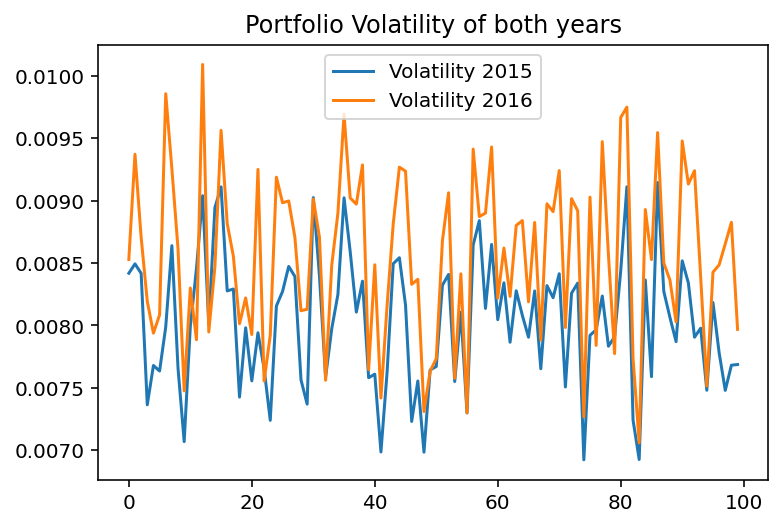

In [107]:
# plot lines
plt.plot(batch_2015, label = "Volatility 2015")
plt.plot(batch_2016, label = "Volatility 2016")
plt.title("Portfolio Volatility of both years")
plt.legend()
plt.show()

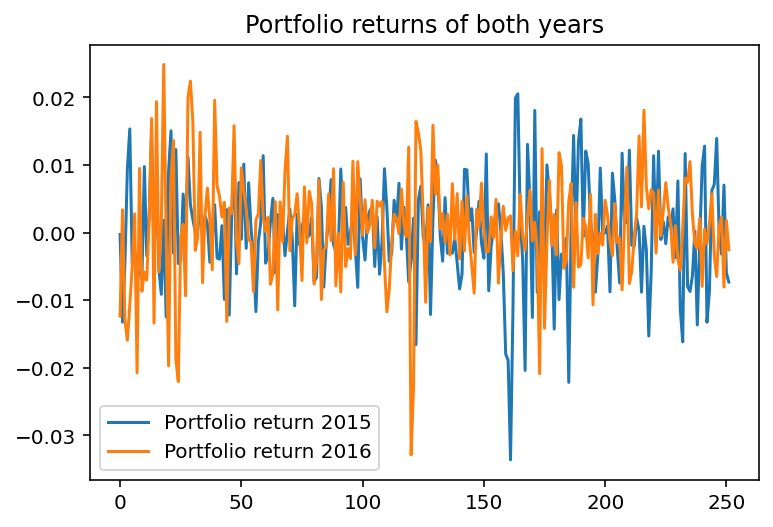

In [108]:
# plot lines
plt.plot(portfolio_2015, label = "Portfolio return 2015")
plt.plot(portfolio_2016, label = "Portfolio return 2016")
plt.title("Portfolio returns of both years")
plt.legend()
plt.show()

## Comment

The above code considers with the functions for generating and analysing random portfolios using historical stock return data for the years 2015 and 2016 We consider returns for list of randomly selected portfolios. The above code includes a function that calculates the volatility of a batch of portfolios. The function takes in arguments such as the returns dataframe, number of portfolios, number of stocks in each portfolio, and time period for calculating volatility. The batch_volatility function is used to calculate the volatility of 100 portfolios with 50 stocks each for the years 2015 and 2016. The results are plotted using matplotlib to compare the volatility of the portfolios for the two years. Finally, the code generates and prints 50 portfolios with 50 randomly selected stocks each.
Also, from the above plotting and graph we infer that the volatility of both the years t and t+1 move along in the same direction. 
It is not possible to determine whether volatility in year 𝑡 predicts mean returns in year 𝑡+1. As volatility is typically the standard deviation of returns, which is a statistical measure of the amount of variation, on the other hand the measure of mean returns, is typically the average or expected return of an asset or portfolio over a specific period. And higher volatility implies greater uncertainty or unpredictability in the returns of the portfolio. The relationship between volatility and mean returns is not always straightforward and may depend on various factors such as market conditions, investment strategy, and the type of concerned portfolio. Past performance doesn’t guarantee of future returns always, hence, decisions and investing involves risks and uncertainties.

### Task 8: Does CAPM beta in year $t$ predict *mean returns* in year $t+1$?

In [109]:
def cal_beta(returns, start_date, end_date, num_portfolio=100, num_assets=50):
    col = returns.loc[start_date : end_date].dropna(axis = 1)
    if col.shape[1] == 0:
        return np.nan
    batches = []
    for i in range(num_portfolio):
        portfolios = np.random.choice(col.columns, num_assets)
        batches.append(col[portfolios])
    beta_values = []
    mkrt_rf_mean = ff['Mkt-RF'].mean()
    if mkrt_rf_mean == 0 or np.isnan(mkrt_rf_mean):
        return np.nan
    for batch in batches:
        t_mean = batch.mean(axis=1).dropna()
        rf_rate = ff['RF'].loc[t_mean.index]
        if t_mean.shape[0] == 0 or rf_rate.shape[0] == 0:
            continue
        beta = (t_mean - rf_rate) / mkrt_rf_mean
        beta = beta.replace([np.inf, -np.inf], np.nan).dropna()
        if beta.shape[0] > 0:
            beta_values.append(beta.mean())
    if len(beta_values) == 0:
        return np.nan
    return np.mean(beta_values)

In [110]:
cal_beta(returns, '2016-01-01','2016-12-31')

3.0143

## Comment 

The CAPM beta measures the sensitivity between the assets return and the markets return. In order to solve this, we made 100 portfolios with 50 stocks at random. The formula for CAPM is:

Expected return = risk-free rate + beta x (market return - risk-free rate)

Risk-free rate: The return on a risk-free investment.
Beta: Measure of systematic risk of an asset.
Market return: Expected return of the market.

A beta of 1 indicates that the assets returns follow the movements of the markets. When the beta is greater than 1 it indicates that the assets returns are more volatile and a beta less than 1 denotes returns less volatile than the market.

The CAPM beta and prediction of market returns have a positive correlation. The greater the volatility in assets, it follows that assets that have large betas should have higher expected returns. It can therefore be said that beta in year t can be used to predict returns of the asset in year t+1. However, it is important to note that market returns are influenced by multiple factors that can cause a shift in our prediction.

Although the CAPM model may be a valuable tool for calculating expected returns, investors should be aware of its limitations when using it to guide their investment choices. Here are a few more things to think about:

1] Model assumptions: The CAPM model is based on a number of hypotheses that might not always hold true in practice. It presumes, for instance, that all investors have access to the same data and have uniform expectations for future returns. Investors may, in fact, have varying knowledge, viewpoints, and risk preferences that influence their investing choices.

2] Market efficiency: The CAPM model also involves the assumption that markets are effective, which means that asset prices represent all available information. The projected returns based on the model could not correctly represent future returns if markets are not fully efficient.

3] Systematic risk: The CAPM only takes into consideration systematic risk, which is a risk that has an impact on the whole market. Assets also have unsystematic risk, which is a risk that is unique to that asset and cannot be mitigated by diversification. This kind of risk, which can alter an asset's real returns and cause them to diverge from what the model predicts, is not taken into account by CAPM.

4] Calculating beta: Calculating an asset's beta can be challenging since it involves historical data and assumptions about how the asset's returns correspond to market returns. These projections may not be exact, particularly for assets with scant trading history or those engaged in markets with distinctive features.

5] Variations over time: Even if an asset's beta is correctly predicted, it may change over time as a result of modifications to the business plan of the firm, changes in the market, or adjustments to the state of the industry. Hence, historical data- and beta-based forecast returns may be less trustworthy.

In conclusion, even though the CAPM model can be helpful for forecasting expected returns, it is not a perfect tool and should be used in with other analyses and information to make investment decisions.

## Portfolios II

Calculate monthly volatility and total return for *every stock* and *every month* in `returns`.
Drop stock-months with fewer than 15 returns.
Each month, assign these stocks to one of five portfolios based on their volatility during the previous month.
Equally weight these portfolios and rebalance them monthly.

### Task 9: Do high volatility portfolios have high mean returns and Sharpe Ratios?

In [111]:
def checking(x):
    return (1 + x).prod() - 1

_return = returns.copy()

monthly_returns = _return.loc['2018-01-01' : '2018-12-31'].dropna(axis=1).resample(rule='M', kind='period')
total_return = monthly_returns.apply(checking)

volatility = monthly_returns.std()


In [112]:
total_return.head()

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACHC,...,XPO,XRAY,XYL,YUM,Z,ZBH,ZBRA,ZG,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01,0.0965,-0.0343,0.0440,0.1735,-0.0106,0.1687,0.0855,0.0944,0.0019,0.0444,...,0.0311,-0.0763,0.0595,0.0365,0.0865,0.0535,0.1865,0.0994,0.0630,0.0669
2018-02,-0.0659,-0.1355,0.0006,-0.0234,0.0682,0.0322,-0.0415,-0.0294,-0.0297,0.1180,...,0.0422,-0.0781,0.0351,-0.0335,0.0722,-0.0855,0.1216,0.0614,0.0213,0.0538
2018-03,-0.0246,-0.0002,-0.0422,0.0382,-0.0581,-0.1829,-0.0941,-0.0068,-0.0300,0.0283,...,0.0343,-0.1010,0.0314,0.0461,0.1286,-0.0599,0.0076,0.1359,-0.0407,0.0328
2018-04,-0.0151,0.1388,-0.1738,-0.0346,-0.0150,0.0306,0.0507,-0.0252,-0.0638,-0.0919,...,-0.0457,0.0006,-0.0523,0.0231,-0.0987,0.0562,-0.0313,-0.1043,0.0383,0.0011
2018-05,-0.0581,-0.0611,0.0166,0.1238,0.1351,0.0248,-0.0892,0.0585,-0.0210,0.1296,...,0.0833,-0.1297,-0.0315,-0.0622,0.2029,-0.0318,0.1385,0.2041,0.0053,0.0026


In [113]:
volatility.head()

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACHC,...,XPO,XRAY,XYL,YUM,Z,ZBH,ZBRA,ZG,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01,0.0115,0.0225,0.0237,0.0206,0.0101,0.0352,0.0138,0.0130,0.0122,0.0181,...,0.0153,0.0203,0.0081,0.0081,0.0202,0.0113,0.0154,0.0200,0.0098,0.0104
2018-02,0.0207,0.0232,0.0237,0.0328,0.0228,0.0242,0.0310,0.0177,0.0140,0.0272,...,0.0259,0.0116,0.0171,0.0193,0.0202,0.0152,0.0332,0.0197,0.0260,0.0208
2018-03,0.0146,0.0224,0.0159,0.0169,0.0167,0.0316,0.0202,0.0156,0.0144,0.0173,...,0.0184,0.0158,0.0161,0.0107,0.0225,0.0170,0.0228,0.0216,0.0184,0.0166
2018-04,0.0169,0.0402,0.0280,0.0247,0.0161,0.0214,0.0196,0.0152,0.0163,0.0176,...,0.0231,0.0130,0.0153,0.0091,0.0208,0.0159,0.0146,0.0225,0.0174,0.0131
2018-05,0.0242,0.0169,0.0187,0.0196,0.0138,0.0207,0.0226,0.0121,0.0096,0.0208,...,0.0222,0.0229,0.0139,0.0188,0.0264,0.0104,0.0280,0.0255,0.0130,0.0133


## Comment 




## Discussion

### Task 10: Discuss and explain any limitations of your analysis above

## Limitations of our assumptions

1) Lack of Context: Historical data on stock prices may provide a snapshot of a stock's past performance, but it doesn't provide context or insight into the reasons behind the price changes. For example, a stock may have gone up in price due to positive earnings reports or good news about the company, or it may have gone down in price due to negative news or poor performance. Without context, it's difficult to understand why a stock performed the way it did in the past, and whether those factors are likely to continue in the future.

2) Ignoring Company Performance: Historical data on stock prices does not provide any information about a company's financial performance, such as revenue, earnings, and profitability. These factors are critical to evaluating a company's long-term potential and determining whether it's a good investment opportunity. By focusing solely on historical stock prices, investors may overlook important financial metrics that could impact a stock's future performance.

3) Limited Information: Historical data on stock prices provides only a snapshot of a stock's past performance, and it doesn't provide any indication of the stock's future prospects. For example, a stock that performed well in the past may not necessarily continue to perform well in the future. Historical data also doesn't provide any information about a company's competitive landscape, market share, or growth prospects, which are all important factors to consider when evaluating an investment opportunity.

4) Incomplete Picture: Historical data on stock prices doesn't provide a complete picture of a company's overall performance and potential. For example, a company may have experienced significant growth in the past, but it may be facing increasing competition or changing market conditions that could impact its future performance. By relying solely on historical data, investors may overlook important factors that could impact a company's future growth and profitability.

In addition to these limitations, analyzing stocks with historical data and prices also does not consider macroeconomic factors that can impact the performance of stocks. Some macro factors that are not reflected in historical stock prices include:

A] Macroeconomic Trends: Changes in interest rates, inflation, and economic growth rates can impact stock prices and company performance. For example, rising interest rates can make it more expensive for companies to borrow money, which could impact their profitability and future growth prospects.

B] Political Events: Changes in government policies and regulations can impact the performance of individual stocks and entire markets. For example, changes in tax laws or trade policies could have a significant impact on certain industries or companies.

C] Global Events: Natural disasters, pandemics, and geopolitical tensions can have a significant impact on stock prices and the performance of individual companies. For example, the COVID-19 pandemic had a significant impact on the stock market and caused many companies to struggle.

D] Industry-Specific Factors: Changes in consumer behavior, technological advancements, and competitive pressures can impact the performance of individual companies and entire industries. For example, the rise of e-commerce has had a significant impact on traditional brick-and-mortar retailers.

E] Legal and Regulatory Factors: Legal and regulatory factors can have a significant impact on the performance of individual companies and entire industries. Changes in laws and regulations can impact a company's operations, profitability, and growth prospects. For example, new regulations on data privacy or environmental protection could impact the operations and profitability of certain companies. Additionally, legal issues such as lawsuits or government investigations can also have a significant impact on a company's stock price and performance.


On other hand, 

The market is often considered to be an efficient market, which means that it quickly incorporates all publicly available information into the prices of stocks, making it difficult for investors to consistently outperform the market through stock selection. This includes using historical price changes to predict future returns.

One reason for this is that stock prices reflect all available information about a company, including its financial performance, growth prospects, and the broader economic and industry-specific factors that could impact its future performance. As a result, any new information that becomes available will be quickly incorporated into the stock price, making it difficult to consistently predict future returns based on past price changes alone.

In addition, stock prices are influenced by a wide range of factors, including changes in interest rates, geopolitical events, regulatory changes, and technological advancements, among others. These factors can impact a company's financial performance and prospects, and they are difficult to predict with a high degree of accuracy.

Moreover, historical stock price changes do not provide any insight into a company's underlying financial performance. To make informed investment decisions, investors need to consider a company's financial statements, including its income statement, balance sheet, and cash flow statement. These financial statements provide critical information about a company's revenue, expenses, assets, liabilities, and cash flows, which can help investors assess a company's financial health and prospects for future growth.

Financial statements also provide insights into a company's profitability, liquidity, and solvency, which are important factors in determining its valuation and potential for future returns. By analyzing a company's financial statements, investors can better understand its strengths and weaknesses, and identify potential investment opportunities.

Finally, it's worth noting that while historical price changes may not be a reliable predictor of future returns, they can still provide important information to investors. For example, analyzing historical price changes can help investors identify trends and patterns in the market, which can inform their investment decisions. Additionally, historical price changes can help investors identify potential buying opportunities or overvalued stocks that should be avoided.

In summary, the market's focus on using financial information rather than market data reflects the understanding that stock prices already reflect all publicly available information, including past price changes. To make informed investment decisions, investors need to consider a company's financial statements, which provide critical information about its financial health and prospects for future growth. While historical price changes may not be a reliable predictor of future returns, they can still provide valuable insights to investors when used in conjunction with other sources of information.

# Criteria

1. All tasks are worth ten points
1. Discuss and explain your findings for all ten tasks
1. Here are a few more tips
    1. ***Your goal is to convince me of your calculations and conclusions***
    1. I typically find figures most convincing
    1. If you use correlations, consider how a handful of outliers may affect your findings
    1. Remove unnecessary code, outputs, and print statements
    1. Write functions for calculations that you expect to use more than once
    1. ***I will not penalize code style, but I will penalize submissions that are difficult to follow or do not follow these instructions***
1. How to submit your project
    1. Restart your kernel, run all cells, and save your notebook
    1. Export your notebook to PDF (`File > Save And Export Notebook As ... > PDF` in JupyterLab)
        1. If this export does not work, you can either (1) Install MikTeX on your laptop with the default settings or (2) use DataCamp Workspace to export your notebook to PDF
        1. You do not need to re-run your notebook to export it because notebooks store output cells
    1. Upload your notebook and PDF to Canvas
    1. Upload your PDF only to Gradescope and tag your teammates
    1. Gradescope helps me give better feedback more quickly, but I do not consider it reliable for sharing and storing your submission files